# Linear Regression with python-Body fat Prediction(where the body fat is predicted using weight)

###  Import the libraries

In [1]:
import warnings
warnings.simplefilter('ignore')

### Import numpy and pandas

In [2]:
import numpy as np
import pandas as pd

### Import data visualisation library

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

### Import the dataset

In [4]:
dataset=pd.read_csv('bodyfat_prediction.csv')

In [5]:
dataset

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


### Understanding the dataset

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [7]:
dataset.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

### From the above dataset information, we can see that there are no null values present.Hence we can proceed with the code.

In [8]:
dataset.shape

(252, 15)

In [9]:
dataset.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


### Slicing the dataset

In [10]:
dataset=dataset.drop(['Age','Density','Height','Neck','Chest','Abdomen','Hip','Thigh','Knee','Ankle','Biceps','Forearm','Wrist'],axis=1,errors='ignore')

In [11]:
dataset

,BodyFat,Weight
0,12.3,154.25
1,6.1,173.25
2,25.3,154.00
3,10.4,184.75
4,28.7,184.25
...,...,...
247,11.0,134.25
248,33.6,201.00
249,29.3,186.75
250,26.0,190.75


### Swapping the columns- so that "Weight" becomes the x-axis and "BodyFat" becomes the y-axis

In [13]:
dataset = dataset[['Weight','BodyFat']]

In [14]:
dataset

,Weight,BodyFat
0,154.25,12.3
1,173.25,6.1
2,154.00,25.3
3,184.75,10.4
4,184.25,28.7
...,...,...
247,134.25,11.0
248,201.00,33.6
249,186.75,29.3
250,190.75,26.0


### Segregate and shape the variables

In [15]:
x=dataset.iloc[:,0]

In [16]:
x.shape

(252,)

In [17]:
x=dataset.iloc[:,0].values.reshape(-1,1)#reshaping the data

In [18]:
x.shape

(252, 1)

In [19]:
x

array([[154.25],
       [173.25],
       [154.  ],
       [184.75],
       [184.25],
       [210.25],
       [181.  ],
       [176.  ],
       [191.  ],
       [198.25],
       [186.25],
       [216.  ],
       [180.5 ],
       [205.25],
       [187.75],
       [162.75],
       [195.75],
       [209.25],
       [183.75],
       [211.75],
       [179.  ],
       [200.5 ],
       [140.25],
       [148.75],
       [151.25],
       [159.25],
       [131.5 ],
       [148.  ],
       [133.25],
       [160.75],
       [182.  ],
       [160.25],
       [168.  ],
       [218.5 ],
       [247.25],
       [191.75],
       [202.25],
       [196.75],
       [363.15],
       [203.  ],
       [262.75],
       [205.  ],
       [217.  ],
       [212.  ],
       [125.25],
       [164.25],
       [133.5 ],
       [148.5 ],
       [135.75],
       [127.5 ],
       [158.25],
       [139.25],
       [137.25],
       [152.75],
       [136.25],
       [198.  ],
       [181.5 ],
       [201.25],
       [202.5 

In [20]:
y=dataset.iloc[:,-1].values.reshape(-1,1)

In [21]:
y.shape

(252, 1)

In [22]:
y

array([[12.3],
       [ 6.1],
       [25.3],
       [10.4],
       [28.7],
       [20.9],
       [19.2],
       [12.4],
       [ 4.1],
       [11.7],
       [ 7.1],
       [ 7.8],
       [20.8],
       [21.2],
       [22.1],
       [20.9],
       [29. ],
       [22.9],
       [16. ],
       [16.5],
       [19.1],
       [15.2],
       [15.6],
       [17.7],
       [14. ],
       [ 3.7],
       [ 7.9],
       [22.9],
       [ 3.7],
       [ 8.8],
       [11.9],
       [ 5.7],
       [11.8],
       [21.3],
       [32.3],
       [40.1],
       [24.2],
       [28.4],
       [35.2],
       [32.6],
       [34.5],
       [32.9],
       [31.6],
       [32. ],
       [ 7.7],
       [13.9],
       [10.8],
       [ 5.6],
       [13.6],
       [ 4. ],
       [10.2],
       [ 6.6],
       [ 8. ],
       [ 6.3],
       [ 3.9],
       [22.6],
       [20.4],
       [28. ],
       [31.5],
       [24.6],
       [26.1],
       [29.8],
       [30.7],
       [25.8],
       [32.3],
       [30. ],
       [21

### Scatter plot

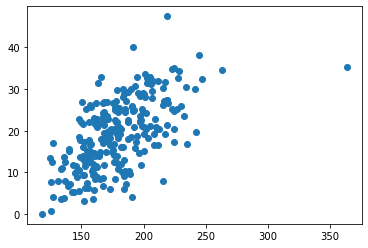

In [23]:
plt.scatter(x,y)#here "x" refers to "Weight" and "y" refers to "BodyFat"
plt.show()

### Hence the above scatter plot indicates that there is a positive correlation between "Weight" and "BodyFat" that is higher the weight of the person, higher is the body fat similarly lower the weight, lower is the body fat.

### Divide the dataset into training and test set

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [26]:
x_train.shape

(201, 1)

In [27]:
x_test.shape

(51, 1)

In [28]:
y_train.shape

(201, 1)

In [29]:
y_test.shape

(51, 1)

### Perform the linear regression

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lm= LinearRegression()

### Train the model-Linear Regression

In [32]:
lm.fit(x_train,y_train)

LinearRegression()

###  Predicting the body fat using weight

In [33]:
y_pred=lm.predict(x_test)

In [34]:
y_pred

array([[12.09320093],
       [17.70558765],
       [14.67407949],
       [18.19718357],
       [14.67407949],
       [17.70558765],
       [21.02386009],
       [22.25284988],
       [18.89361112],
       [20.20453356],
       [26.26754987],
       [18.48394785],
       [17.33689071],
       [22.86734478],
       [15.41147337],
       [10.20874991],
       [23.93246927],
       [10.33164889],
       [19.63100499],
       [16.35369888],
       [24.21923355],
       [16.64046316],
       [20.81902846],
       [17.29592439],
       [17.70558765],
       [23.72763763],
       [21.02386009],
       [22.17091723],
       [15.32954072],
       [21.9660856 ],
       [25.03856008],
       [18.81167846],
       [19.75390397],
       [13.60895501],
       [27.12784273],
       [15.28857439],
       [27.8652366 ],
       [24.17826722],
       [12.70769583],
       [14.79697847],
       [17.09109275],
       [19.30327438],
       [26.26754987],
       [20.40936519],
       [18.72974581],
       [16

### Checking the prediction

In [35]:
check=pd.DataFrame(x_test,columns=['Weight'])

In [36]:
check['BodyFat Actual']=y_test

In [37]:
check['BodyFat Predicted']=y_pred

In [38]:
check

,Weight,BodyFat Actual,BodyFat Predicted
0,136.50,12.5,12.093201
1,170.75,27.0,17.705588
2,152.25,3.0,14.674079
3,173.75,20.4,18.197184
4,152.25,9.4,14.674079
5,170.75,23.6,17.705588
6,191.00,25.8,21.023860
7,198.50,25.2,22.252850
8,178.00,25.8,18.893611
9,186.00,27.1,20.204534


###  Visualise the regressor line

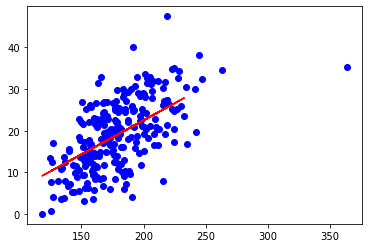

In [39]:
plt.scatter(x,y,color='blue')
plt.plot(x_test,y_pred,color='red')

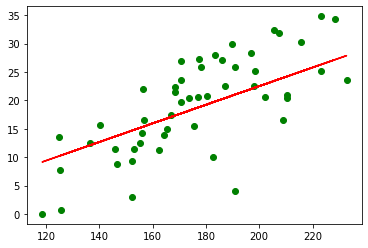

In [40]:
plt.scatter(x_test,y_test,color='green')
plt.plot(x_test,y_pred,color='red')

### Hence the regressor line is linear, which clearly tells us that,as the weight increases ,the body fat also increases and vice versa.